<a href="https://colab.research.google.com/github/yoonlee78/lab_workshop/blob/master/Week6_NeuralNet_Part3(Last).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 밑바닥 딥러닝
## hfpsych lab workshop
### 2019.7.26 Fri.

## 3.5. 출력층 설계하기
### 3.5.1. 항등 함수와 소프트맥스 함수 구현하기
### 3.5.2. 소프트맥스 함수 구현 시 주의점
### 3.5.3. 소프트맥수 함수의 특징
### 3.5.4. 출력층의 뉴런 수 정하기 
## 3.6. 손글씨 숫자 인식
### 3.6.2. 신경망의 추론 처리
### 3.6.3. 배치 처리 
## 3.7. 정리 


In [0]:
!git clone https://github.com/WegraLee/deep-learning-from-scratch.git

In [0]:
import os
os.chdir('deep-learning-from-scratch/ch03')

### 3.5. 출력층 설계하기 

- [Winter 2019 workshop 복습] Introduction to Machine Learning (by Andrew Ng)  : Chapter 01. Introduction 
    - Machine Learning : Regression vs Classification
    << 그림 >>

신경망은 분류와 회귀 모두에 이용할 수 있으나, 둘 중 어떤 문제냐에 따라 츨력층에서 사용하는 활성화 함수 (&sigma;)가 달라진다. 일반적으로 **회귀**에는 **항등 함수**를, **분류**에는 **소프트맥스 함수**를 사용한다. 



#### 3.5.1. 항등 함수와 소프트맥스 함수 구현하기


**항등 함수** (identity function)는 입력을 그대로 출력한다. 


#### 그림 3-21. 항등 함수 ( PPT)





#### 수식 3.10 소프트맥스 함수

\begin{equation*}
y_{k} = \frac{exp(a_{k})}{\sum_{i=1}^{n} exp(a_{i})}
\end{equation*}

exp(x) = _e_<sup>k</sup> 지수함수 (exponential function) <br>
_e_ = 자연상수 <br>
n = 출력층의 뉴런 수 <br>
y<sub>_k_</sub> 그 중 k번째 출력 <br>

분자: exp(_a_<sub>_k_</sub>) = 입력 신호 _a_<sub>_k_</sub>의 지수 함수  
분모: 모든 입력 신호의 지수 함수의 합

- 모든 입력 신호(input)로부터 화살표를 받는다. 분모에서 알 수 있듯이 출력층의 각 뉴런이 모든 입력 신호에서 영향을 받기 때문이다. 


#### 소프트맥스 함수 시각화



In [0]:
import numpy as np

In [0]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a) #지수 함수

In [5]:
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [0]:
#지수 함수의 합
sum_exp_a = np.sum(exp_a)

In [7]:
print(sum_exp_a)

74.1221542101633


In [0]:
y = exp_a / sum_exp_a

In [9]:
print(y)

[0.01821127 0.24519181 0.73659691]


### 3.5.2. 소프트맥스 함수 구현 시 주의점

컴퓨터로 소프트맥스를 계산할 때 오버플로 문제가 발생할 수 있음. 

오버플로(Overflow) : 표현할 수 있는 수의 범위가 한정되어 너무 큰 값은 표현할 수 없음. 

#### 소프트맥스 함수를 개선한 수식

[3.11.1] \begin{equation*}
y_{k} = \frac{exp(a_{k})}{\sum_{i=1}^{n} exp(a_{i})} = \frac{C exp(a_{k})}{C \sum_{i=1}^{n} exp(a_{i})}
\end{equation*}

[3.11.2]
\begin{equation*}
= \frac{exp(a_{k}+logC)}{\sum_{i=1}^{n} exp(a_{i}+logC)}
\end{equation*}

[3.11.3]
\begin{equation*}
= \frac{exp(a_{k}+C')}{\sum_{i=1}^{n} exp(a_{i}+C')}
\end{equation*}

3.11.1에서는 C라는 임의의 정수를 분자와 분모 양쪽에 곱함 (양쪽에 같은 수를 곱했으니 결국 똑같은 계산)

3.11.2.에서 C를 지수 함수 exp() 안으로 옮겨 logC로 만들음. 마지막으로 logC를 C라는 새로운 기호로 바꿈

[식 3.11]이 말하는 것은 소프트맥스의 지수 함수를 계산할 때 어떤 정수를 더해도 (혹은 빼도) 결과는 바뀌지 않는다는 것. 여기서 C'에 어떤 값을 대입해도 상관없으나, 오버플로를 막을 목적으로는 입력 신호 중 최댓값을 이용하는 것이 일반적이다. 


In [4]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a)) #소프트맥스 함수의 계산

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([nan, nan, nan])

아무런 조치 없이 계산하면 nan이 나옴. nan = not a number

In [0]:
c = np.max(a) #C의 최댓값

In [6]:
a - c

array([  0, -10, -20])

In [7]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

하지만 입력 신호 중 최댓값(=c)을 빼주면 바르게 계산 가능하다. 이를 바탕으로 소프트맥스를 다시 구현하면 다음과 같다.

In [0]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c) # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### 3.5.3. 소프트맥수 함수의 특징

softmax()함수를 사용하면 신경망의 출력은 다음과 같이 계산 가능하다. 

In [9]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [11]:
np.sum(y)

1.0

이 성질 덕분에 softmax()함수의 출력을 '확률'로 해석 가능하다. 가령 앞의 예에서 y[0]의 확률은 0.018(1.8%), y[1]의 확률은 0.245(24.5%), y[2]의 확률은 0.737로 해석할 수 있다. 그리고 이 결과 확률들로부터 "2번째 원소의 확률이 가장 높으니 답은 2번째  클래스다"라고 할 수 있다. 또는 "74%의 확률로 2번째 클래스, 25% 확률로 1번째 클래스, 1%의 확률로 0번째 클래스다"와 같이 확률적인 결론도 낼 수 있다. 즉, 소프트맥수 함수를 이용함으로써 문제를 **확률적(통계적)으로 대응할 수 있다**. 

**주의** 소프트맥스 함수는 단조 증가 함수 (정의역 원소 a,b가 a<=b일때 f(a)<=f(b)가 성립하는 함수). 실제로 앞의 예에서 a의 원소들의 대소 관계가 y 의 원소들 사이의 대소 관계로 그대로 이어진다. 예를 들어 a에서 가장 큰 원소는 2번째 원소이고, y에서 가장 큰 원소도 2번째 원소이다. 

기계학습의 문제 풀이는 **학습**과 **추론( reference)** 으로 나뉜다. 학습 단계에서는 모델을 학습하고, 추론 단계에서는 앞서 학습한 모델로 미지의 데이터에 대해서 추론(분류)를 수행한다. 보통 추론 단계에서는 출력층의 소프트맥스 함수를 생략하는 것이 일반적이고 학습 단계에서는 출력층에서 소프트맥스 함수를 사용한다. 



### 3.5.4. 출력층의 뉴런 수 정하기

#### 그림 3-23. 출력층의 뉴런은 각 숫자에 대응한다. 

### 3.6. 손글씨 숫자 인식

### 3.6.1. MNIST 데이터셋

이번 예에서 사용하는 데이터셋은 MNIST라는 손글씨 숫자 이미지 집합이다. 

- 구성: 0 ~ 9까지의 숫자 이미지. 훈련 이미지: 60,000장, 시험 이미지: 10,000장. 

wiki: https://en.wikipedia.org/wiki/MNIST_database

훈련 이미지로 모델을 학습한 후, 시험 이미지들을 얼마나 정확하게 분류하는지를 평가

MNIST의 이미지 데이터는 28 X 28 크기의 회색조 이미지, 각 픽셀 값은 0~255. 각 이미지에는 실제 의미하는 숫자가 레이블로 붙어 있음

mnist.py 파일에 정의된 load_mist()함수를 이용하면 데이터 로드 가능



```
import sys, os
sys.path.append(os.pardir) # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist
```



In [0]:
#### 참고:  tensorflow 에도 내장되어 있음  - 지금은 skip. 

#import tensorflow as tf
#from tensorflow.examples.tutorials.mnist import input_data

# Read data
#mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

In [0]:
#필요하지 않은 경우 skip할 것
#!wget https://raw.githubusercontent.com/WegraLee/deep-learning-from-scratch/master/dataset/mnist.py

The code uses built-in capabilities of TensorFlow to download the dataset locally and load it into the python variable. As a result (if not specified otherwise), the data will be downloaded into the MNIST_data/ folder.

In [0]:
#!mkdir dataset #필요하지 않은 경우 skip할 것

In [0]:
#!mv mnist.py dataset #필요하지 않은 경우 skip할 것

In [11]:
import sys, os
sys.path.append(os.pardir) # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist

# 처음 한 번은 몇 분 정도 걸립니다.
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

# 각 데이터의 형상 출력
print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000,)
print(x_test.shape)  # (10000, 784)
print(t_test.shape)  # (10000,)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


```load_mnist```함수는 읽은 MNIST 데이터를 "(훈련 이미지, 훈련 레이블), (시험 이미지, 시험 레이블)"형식으로 반환한다. 인수로는 normalize, flatten, one_hot_label 3가지를 설정한다. 

3개의 인수 모두 bool 값이다. 

1. normalize : 입력 이미지의 픽셀 값을 0.0 ~ 1.0 사이의 값으로 정규화할지를 정한다. False로 설정할 경우 입력 이미지의 픽셀은 원래 값 그대로 0~255 사이의 값을 유지한다. 

2. flatten : 입력 이미지를 평탄하게 (1차원 배열로) 만들지를 정한다. False로 설정하면 입력 이미지를 1x28x28의 3차원 배열로, True로 설정하면 784개의 원소로 이루어진 1차원 배열로 저장한다. 

3. one_hot_label : 레이블을 **원-핫-인코딩<sup>one-hot encoding</sup>** 형태로 저장할지를 정한다.  원 핫 인코딩은 정답을 뜻하는 원소만 1이고 (hot하고) 나머지는 모두 0인 배열이다 (예: [0,0,1,0,0,0,0,]). one_hot_label이 False이면 '7'이나 '2'와 같이 숫자 형태의 레이블을 저장하고, True일 경우 원-핫-인코딩된 레이블을 저장한다. 



In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    plt.imshow(np.array(pil_img))
    


5
(784,)
(28, 28)


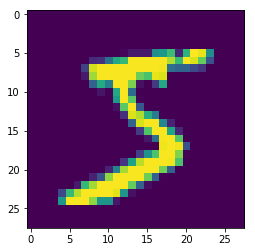

In [13]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]

print(label) # 5

print(img.shape)          # (784,)
img = img.reshape(28, 28) # 원래 이미지의 모양으로 변형
print(img.shape)          # (28, 28)

img_show(img)

**주의** flatten = True 로 설정해 읽어 들인 이미지는 1차원 넘파이 배열로 저장되어 있음. 따라서 이미지를 표시할 때는 원래 형상인 28 * 28 크기로 다시 변형해야한다. reshape() 메서드에 원하는 형상을 인수로 정하면 넘파이 배열의 형상을 바꿀 수 있다. 또한, 넘파이로 저장된 이미지 데이터를 PIL용 데이터 객체로 변환해야하며 이는 Image.fromarray()가 수행한다. 

### 3.6.3. 신경망의 추론 처리 

입력 뉴런을 784개, 출력층 뉴런을 10개로 구성한다. 
첫 번째 은닉층은 50개의 뉴런, 두 번째 은닉층은 100개의 뉴런을 배치한다. 

In [0]:
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label = False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1 #1층 레이어의 가중치 합
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2 #2층 레이어의 가중치 합
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3 #3층 레이어의 가중치 합
    y = softmax(a3) #최종 출력
    
    return y

init_network()에는 pickle파일인 sample_weight.pkl에 저장된 '학습된 가중치 매개변수'를 읽는다. 이 파일에는 가중치와 편향 매개 변수가 딕셔너리 변수로 저장되어 있다. pickle은 이럴 때 아주 유용한 파이썬 메소드이다. 

위에 정의한 함수들로 신경망에 의한 추론을 수행해보고 **정확도**<sup>accuracy</sup>(분류가 얼마나 올바른가)도 평가해보자

In [0]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) 

In [18]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻음
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


1. MNIST 데이터셋으로 네트워크 생성

2. for문을 돌면서 x에 저장된 이미지 데이터를 1장씩 꺼내 predict()함수로 분류. 

-- **predict()** : 각 레이블의 확률을 넘파이 배열로 반환

3. np.argmax()함수로 이 배열에서 값이 가장 큰 (확률이 가장 높은) 원소의 인덱스를 구함 (= 예측 결과)

4.  신경망이 예측한 답변과 정답 레이블을 비교하여 맞힌 숫자(accuracy_cnt)를 세고, 전체 이미지 숫자로 나눠 정확도 계산

**정규화(normalize)** : 데이터를 특정 범위로 변환하는 처리

여기서는 normalize를 True로 설정. 각 픽셀의 값을 0.0~1.0 범위로 변환.

  - 데이터 전체 평균과 표준편차를 이용하여 데이터들이 0을 중심으로 분포하도록 이동시킴

   - 데이터의 확산 범위를 제한하는 정규화를 수행

**전처리(pre-processing)**: 신경망의 입력 데이터에 특정 변환을 가하는 것 (위 정규화를 포함)


### 3.6.3. 배치 처리

각 층의 가중치 형상을 출력 (W)

In [19]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

x.shape

(10000, 784)

In [20]:
x[0].shape

(784,)

In [21]:
W1.shape

(784, 50)

In [22]:
W2.shape

(50, 100)

In [23]:
W3.shape

(100, 10)

최종 결과: 원소가 10개인 1차원 배열 Y가 출력된다. 

#### 그림 3-26.
#### 그림 3-27

- 입력 데이터 형상(shape)은 100 * 784, 출력 데이터의 형상(shape)은 100 * 10이다. 
-  100장 분량의 입력 데이터의 결과가 한 번에 출력됨 ( 배치)

- **배치**: 하나로 묶은 데이터

- 배치 처리의 장점 : 이미지 1장당 처리 시간을 대폭 줄임

  -- 수치 계산 라이브러리 대부분이 큰 배열을 효율적으로 계산함

  -- 버스에 주는 부하를 줄임( = 느린 I/O를 통해 데이터를 읽는 횟수가 줄어, CPU, GPU로 순수 계산을 수행하는 비율이 높아짐)
  
  -- 컴퓨터에서는 큰 배열을 한꺼번에 계산하는 것이 분할된 작은 배열을 여러 번 계산하는 것보다 빠르다



#### 배치 처리 구현 (다음 장 4. 신경망 학습에서 4.2.3. 미니배치 학습할 때 방문)

In [24]:
x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기 (1)
accuracy_cnt = 0
for i in range(0, len(x), batch_size): #for문 (2)
    x_batch = x[i:i+batch_size] #입력 데이터의 i번째부터 i+batch_size번째까지의 데이터를 묶음
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


```range(start, end, step)``` 처럼 인수를 3개 지정하면 start에서 end-1까지 step 간격으로 증가하는 리스트를 반환

In [26]:
list( range(0, 10) )


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [27]:
list( range(0, 10, 3) )


[0, 3, 6, 9]

range()함수가 반환하는 리스트를 바탕으로 x[i:i+batch_n]에서 입력데이터를 묶음
    -- x 입력 데이터 i번째부터 i+batch_n번째까지 데이터를 묶는다는 의미

- batch_size가 100이므로 x[0:100], x[100:200]와 같이 100장씩 묶어 꺼냄. 

- argmax(): 최대값의 인덱스를 가져옴

- axis=1 인수를 추가한 것에 주의: **100 X 10의 배열 중 1번째 차원을 구성하는 각 원소에서(1번째 차원을 축으로) 최대값의 인덱스를 찾도록 한 것** (아래 예시 참조)


In [0]:
#argmax axis 예시

x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
y = np.argmax(x, axis=1)

#### 배치 단위로 분류된 결과를 실제 답과 비교. 

비교를 위해 ==연산자 사용

넘파이 배열끼리 비교하여 True/False로 구성된 bool 배열을 생성, 이 결과 배열에서 True가 몇 개인지 카운트함.

In [29]:
#True 개수를 센다 
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print(y==t)
np.sum(y==t)

[ True  True False  True]


3

### 3.7 정리 
### Chapter 03.에서 배운 내용 

- **활성화 함수**

- 신경망에서는 **활성화 함수**로 **시그모이드**를, **ReLU 함수** 같은 (비선형) 매끄럽게 변화하는 함수를 이용한다.

- 넘파이의 **다차원 배열**을 잘 사용하면 신경망을 효율적으로 구현 가능하다. 다만 행렬의 곱에서는 각 형상의 행렬이 일치해야 계산이 가능하다. 

- 기계학습 문제는 크게 **회귀와 분류**로 나눌 수 있다. 

- **출력층**의 활성화 함수로 회귀에서는 주로 항등 함수, 분류에서는 주로 소프트맥스 함수를 이용한다.

- 분류에서는 출력층의 뉴런 수로 분류하는 클래스 수와 같게 설정한다.

- 입력 데이터를 묶은 것을 **배치**라고 한다. 추론 처리를 배치 단위로 진행하면 결과를 훨씬 빠르게 얻을 수 있다.